In [1]:
!pip install openai python-dotenv
!pip install -U lida

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 327.5/327.5 kB 3.5 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 75.6/75.6 kB 6.1 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 77.9/77.9 kB 4.7 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 58.3/58.3 kB 4.7 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 7.3/7.3 MB 30.3 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 62.4/62.4 kB 1.3 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 92.0/92.0 kB 6.4 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 79.9/79.9 MB 7.8 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.1/1.1 MB 41.8 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 45.5/45.5 kB 3.1 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 173.8/173.8 kB 10.8 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 71.9/71.9 kB 6.0 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━

In [2]:
from lida import llm, Manager, TextGenerationConfig
import pandas as pd
import os, re
from openai import OpenAI
from dotenv import load_dotenv

# Load environment variables from the .env file
load_dotenv(dotenv_path='apikey.env.txt')

# Get the API key from the environment variables
APIKEY = os.getenv("OPENAI_API_KEY")

# Initialize the text generation model
text_gen = llm("openai")

# Initialize the LIDA manager
lida = Manager(text_gen=text_gen)

# Set the API key in the environment (only needed if directly using OpenAI API without LIDA)
#os.environ["OPENAI_API_KEY"] = "111111111111111111111111111111111111111111"

In [3]:
textgen_config = TextGenerationConfig(n=2, temperature=0.5, model="gpt-3.5-turbo-0301", use_cache=True)

summary = lida.summarize("https://raw.githubusercontent.com/uwdata/draco/master/data/cars.csv", summary_method="default", textgen_config=textgen_config)
#goals = lida.goals(summary, n=2, textgen_config=textgen_config)

#for goal in goals:
#    display(goal)

# goals can also be based on a persona
persona = "data summary"
personal_goals = lida.goals(summary, n=2, persona=persona, textgen_config=textgen_config)
#for goal in personal_goals:
#    display(goal)

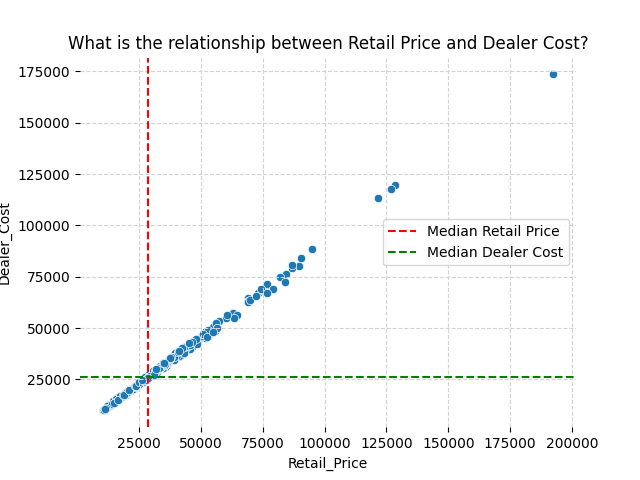

In [4]:
# Index to select the specific goal from the list of generated personal goals
i = 0

# Library to be used for generating the visualization; in this case, Seaborn
library = "seaborn"

# Configuration for text generation:
# - n=1: Number of text generations to produce
# - temperature=0.2: Sampling temperature for generation (lower value means more deterministic results)
# - use_cache=True: Whether to use cached results if available
textgen_config = TextGenerationConfig(n=1, temperature=0.2, use_cache=True)

# Generate visualizations based on the selected summary and goal:
# - summary: The summarized data to base the visualizations on
# - goal: The specific goal from the personal_goals list, selected by index i
# - textgen_config: Configuration settings for the text generation process
# - library: The visualization library to use (e.g., Seaborn)
charts = lida.visualize(summary=summary, goal=personal_goals[i], textgen_config=textgen_config, library=library)

# Access and display the first generated chart from the list of charts
charts[0]


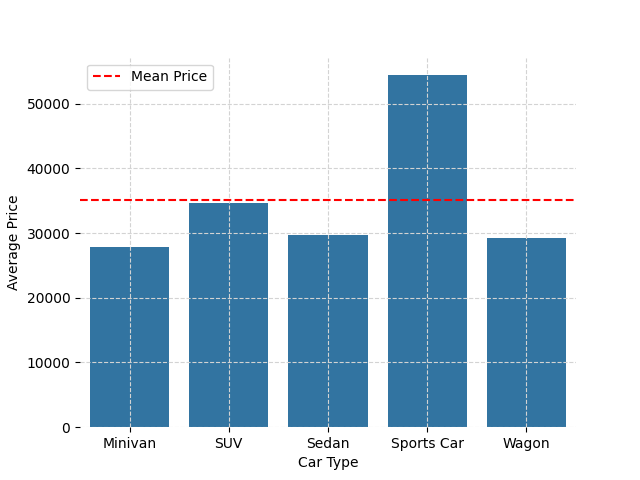

In [9]:
user_query = "What is the average price of cars by type?"
textgen_config = TextGenerationConfig(n=1, temperature=0.2, use_cache=True)
charts = lida.visualize(summary=summary, goal=user_query, textgen_config=textgen_config)
#code = code
charts[0]

In [7]:
print(code)

NameError: name 'code' is not defined

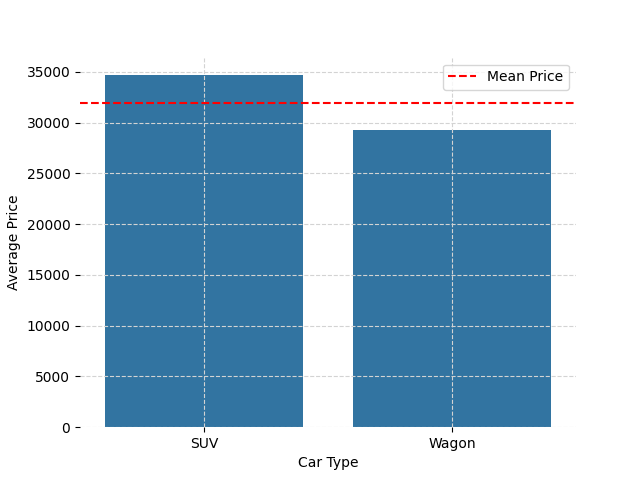

In [10]:
code = charts[0].code
textgen_config = TextGenerationConfig(n=1, temperature=0, use_cache=True)
instructions = "visualize only for SUV and Wagons"
edited_charts = lida.edit(code=code, summary=summary, instructions=instructions, library=library, textgen_config=textgen_config)
code = edited_charts[0].code

edited_charts[0]

In [11]:
print(edited_charts[0].code)

import seaborn as sns
import pandas as pd
import matplotlib.pyplot as plt

def plot(data: pd.DataFrame):
    # solution plan
    # i. filter data for SUV and Wagons
    filtered_data = data[data['Type'].isin(['SUV', 'Wagon'])]
    # ii. group filtered data by Type and calculate the mean of Retail_Price
    grouped_data = filtered_data.groupby('Type')['Retail_Price'].mean().reset_index()
    # iii. plot the grouped data using a barplot
    ax = sns.barplot(x='Type', y='Retail_Price', data=grouped_data)
    ax.set_ylabel('Average Price')
    ax.set_xlabel('Car Type')
    ax.axhline(y=grouped_data['Retail_Price'].mean(), color='r', linestyle='--', label='Mean Price')
    ax.legend()
    return plt

chart = plot(data)
